<a href="https://colab.research.google.com/github/robitussin/CCADMACL_EXERCISES/blob/main/Exercise2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**


In [422]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Path to dataset files: /home/darren/.cache/kagglehub/datasets/rohan0301/unsupervised-learning-on-country-data/versions/2
True


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [423]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [424]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Path to dataset files: /home/darren/.cache/kagglehub/datasets/rohan0301/unsupervised-learning-on-country-data/versions/2
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [425]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [426]:
df.shape

(167, 10)

Show summary statistics using `describe()`. `(5 pts)`

In [427]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [428]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [429]:
df = df.drop("country", axis=1)

In [430]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [431]:
scaler = StandardScaler()

feature_to_standardized = ["gdpp", "income"]
scaled_data = scaler.fit_transform(df[feature_to_standardized])
scaled_df = pd.DataFrame(scaled_data, columns=feature_to_standardized)
df = df.drop(columns=feature_to_standardized)
df = pd.concat([df, scaled_df], axis=1)

In [432]:
df.head()

,child_mort,exports,health,imports,inflation,life_expec,total_fer,gdpp,income
0,90.2,10.0,7.58,44.9,9.44,56.2,5.82,-0.679180,-0.808245
1,16.6,28.0,6.55,48.6,4.49,76.3,1.65,-0.485623,-0.375369
2,27.3,38.4,4.17,31.4,16.10,76.5,2.89,-0.465376,-0.220844
3,119.0,62.3,2.85,42.9,22.40,60.1,6.16,-0.516268,-0.585043
4,10.3,45.5,6.03,58.9,1.44,76.8,2.13,-0.041817,0.101732


## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

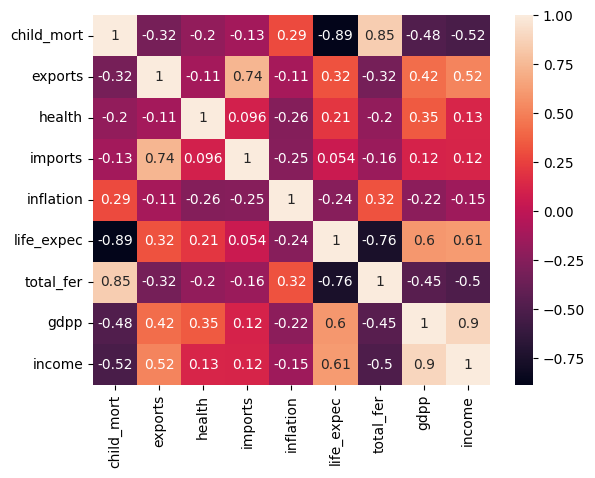

In [433]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()



Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

***OBSERVATION***:  *among the correlation, health and income stands out. because they have the suitable correlation that clustering it is much easier*

In [ ]:
x = df["health"]
y = df["income"]
z = df["life_expec"]

data = df[["gdpp", "life_expec"]]

In [435]:
data.head()

,gdpp,life_expec
0,-0.679180,56.2
1,-0.485623,76.3
2,-0.465376,76.5
3,-0.516268,60.1
4,-0.041817,76.8


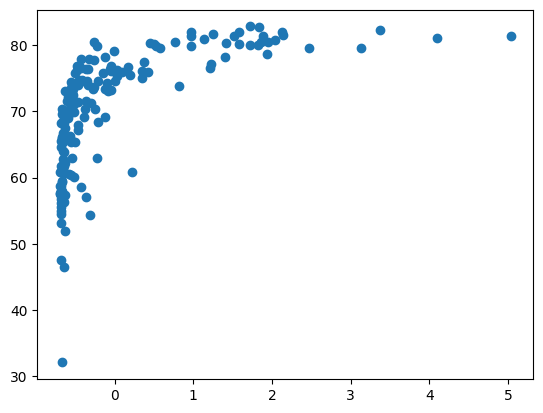

In [436]:
import plotly.express as px

# fig = px.scatter_3d(data, x="income", y="life_expec", z='child_mort', size="child_mort")
# fig.show()


plt.scatter(x=df["gdpp"], y=df["life_expec"])

## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

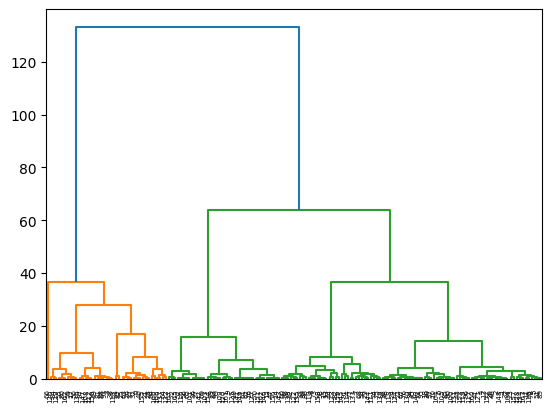

In [437]:
Z_ward = linkage(data, method="ward")
den_ward = dendrogram(Z_ward)

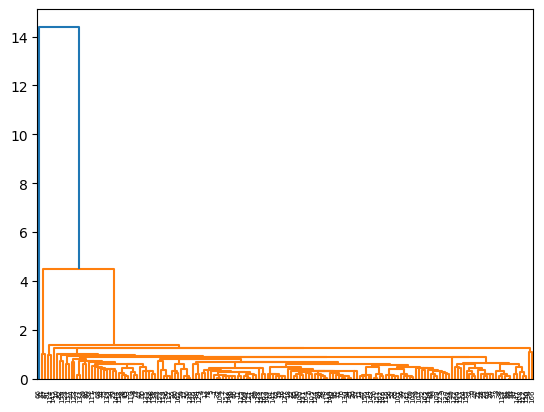

In [438]:
# SINGLE
Z = linkage(data, method="single")
den = dendrogram(Z)


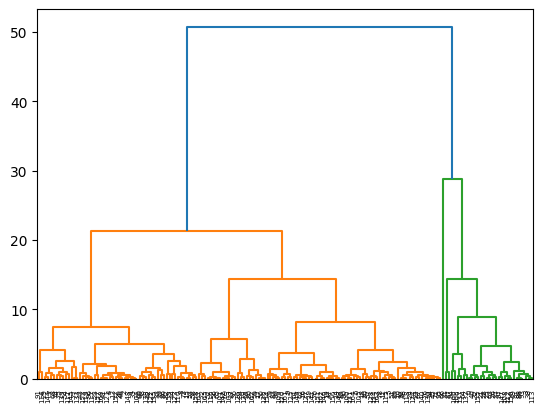

In [439]:
# COMPLETE

Z = linkage(data, method="complete")
den = dendrogram(Z)

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

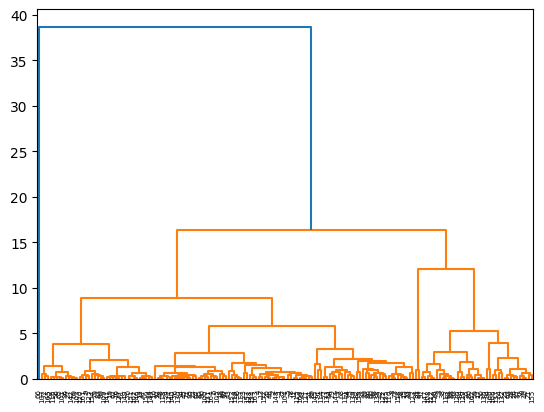

In [440]:
# MEDIAN

Z = linkage(data, method="average")
den = dendrogram(Z)

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [441]:
# Silhouette Score
# data = pd.DataFrame({'x':x_axis, 'y':y_axis})
from sklearn.metrics import silhouette_score
for k in range(2,6):# Maximum range should be 6, as it contains only 6 data points
  cluster_H = AgglomerativeClustering(n_clusters=k,linkage= 'ward')
  model_clt = cluster_H.fit(data)
  label = model_clt.labels_
  sil_coeff = silhouette_score(data,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))
print('\n')

     


For cluster= 2, Silhouette Coefficient is 0.6207717032421393
For cluster= 3, Silhouette Coefficient is 0.5329765690239213
For cluster= 4, Silhouette Coefficient is 0.5407051561037485
For cluster= 5, Silhouette Coefficient is 0.5635744040071373




In [449]:
cluster_H = AgglomerativeClustering(n_clusters=2,linkage= 'ward')
model_clt = cluster_H.fit(df)
print(model_clt)
print('\n')

df['clusters'] = model_clt.labels_
print('Clusters assigned to each datapoints, cluster = 3 :')
print(df['clusters'])

AgglomerativeClustering()


Clusters assigned to each datapoints, cluster = 3 :
0      1
1      0
2      0
3      1
4      0
      ..
162    0
163    0
164    0
165    1
166    1
Name: clusters, Length: 167, dtype: int64


## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

<Axes: xlabel='gdpp', ylabel='life_expec'>

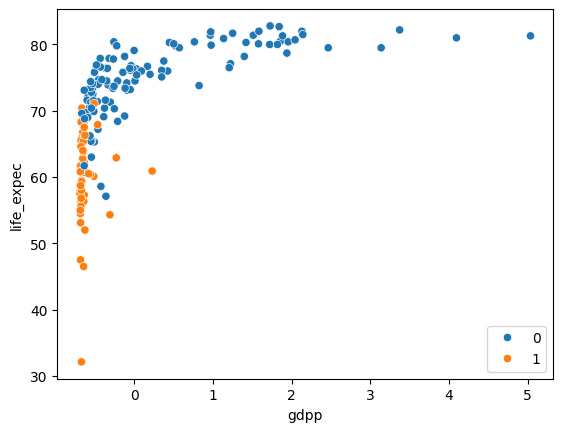

In [450]:
# fig = px.scatter_3d(data, x="income", y="life_expec", z='child_mort', size="life_expec", color=model_clt.labels_)
# fig.show()

sns.scatterplot(data, x="gdpp", y="life_expec", hue=model_clt.labels_)

Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

***ANSWER***: *As you can see, Orange dots represents the countries who has a low gdpp and lower life expectancy. and the Blue ones are the countries who has high gdpp and high life expectancy*

## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


**REFLECTION**

***Health***: *Countries who has low gdpp often leads to declinement of low life expectancy, this is due to low access to nutritional foods and diets that leads to early deaths.*



***Finance***: *Having low gdpp is not a good sign if a country wants to strive to become a good country, they must implement a better governance and good employement strategies.Because the higher the gdpp the better the economy and every other aspects.*